In [3]:
import numpy as np
import pandas as pd

In [9]:
# Assuming you have a csv file called 'acs_5yr_est_selected_economic_characteristics_2010-2022.csv'
df = pd.read_csv('../Data/all_stock_and_etfs.csv')

<Figure size 1000x600 with 0 Axes>

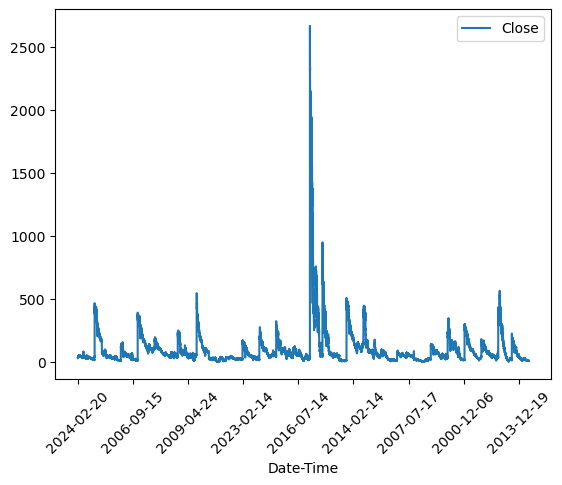

In [12]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))  # Adjust the figure size if needed
df.plot(x='Date-Time', y='Close', kind='line')
plt.xticks(rotation=45)  # Rotate the x-tick labels by 45 degrees
plt.show()